<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [151]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [152]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [153]:
import pandas as pd

## Demo: How to run an sql query


In [154]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [155]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [156]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn).head(5)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


## Demo: How to describe a table


In [157]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iloc[0][0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

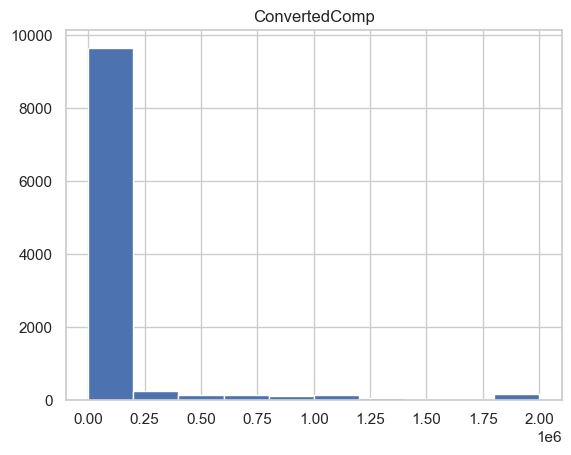

In [158]:
# your code goes here

QUERY = """
SELECT 
    ConvertedComp 
FROM master 
"""

df = pd.read_sql_query(QUERY,conn)
df.hist()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:ylabel='Age'>

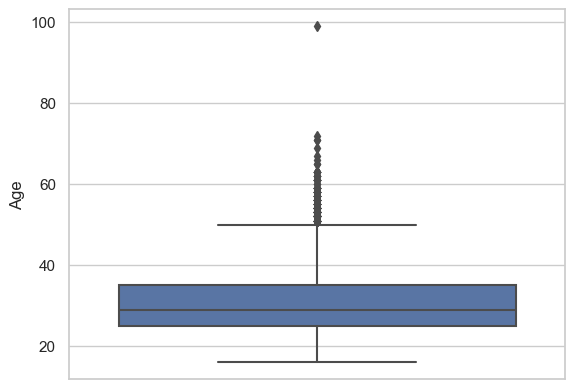

In [159]:
import seaborn as sns

QUERY = """
SELECT 
    Age 
FROM master 
"""

df = pd.read_sql_query(QUERY,conn)
sns.boxplot(y=df['Age'])


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

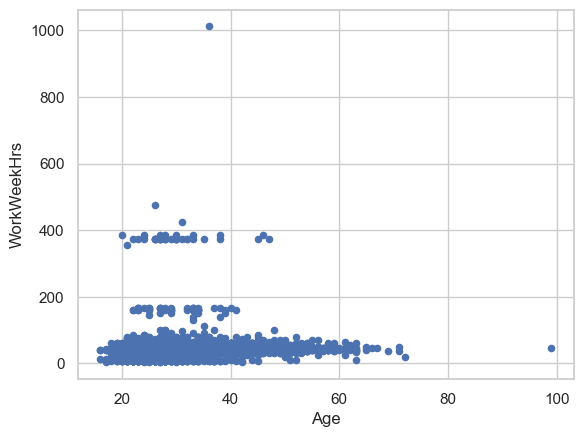

In [160]:
QUERY = """
SELECT 
    Age,
    WorkWeekHrs
FROM master 
"""

df = pd.read_sql_query(QUERY,conn)
df.plot(x='Age', y='WorkWeekHrs', kind='scatter')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

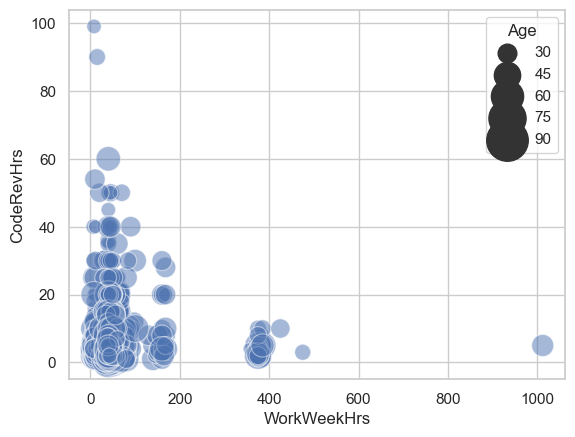

In [161]:
QUERY = """
SELECT 
    Age,
    WorkWeekHrs,
    CodeRevHrs
FROM master 
"""

df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(
    x=df['WorkWeekHrs'],
    y=df['CodeRevHrs'],
    size=df['Age'],
    sizes=(15, 1000),
    alpha=0.5
)


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


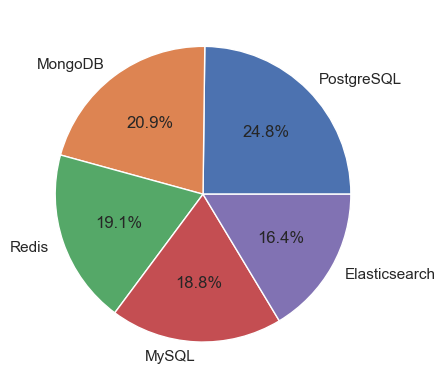

In [171]:
# your code goes here
query = """
SELECT 
DatabaseDesireNextYear,
COUNT(DISTINCT Respondent) Respondents

FROM DatabaseDesireNextYear
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5
"""
df = pd.read_sql_query(query,conn)
import matplotlib.pyplot as plt
x = df['Respondents']
labels=df['DatabaseDesireNextYear']
plt.pie(x=x, labels=labels, autopct='%.01f%%')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:>

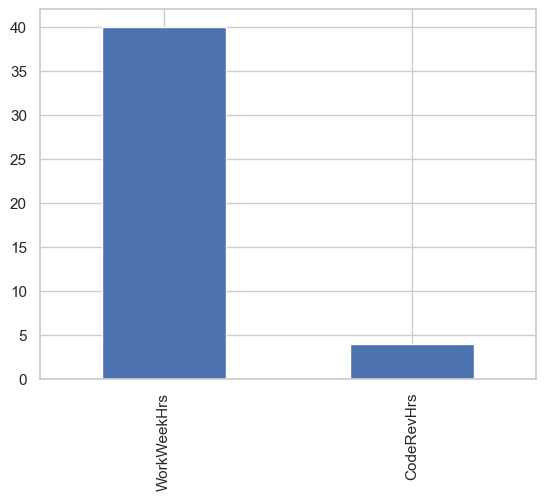

In [ ]:
# your code goes here
query="""
SELECT
    WorkWeekHrs,
    CodeRevHrs
FROM master
WHERE 1=1
    AND Age>=30
    AND Age<=35
"""
df = pd.read_sql_query(query,conn)

df.median().plot(kind='bar')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

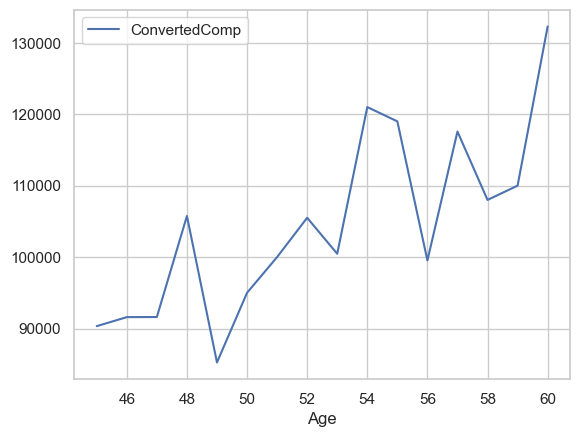

In [ ]:
# your code goes here
query="""
SELECT
    Age,
    ConvertedComp
FROM master
WHERE 1=1
    AND Age>=45
    AND Age<=60
"""
df = pd.read_sql_query(query,conn)

df.groupby('Age', as_index=False).median().plot(kind='line', y='ConvertedComp', x='Age')


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [ ]:
# your code goes here
query="""
SELECT
    MainBranch
FROM master
"""
df = pd.read_sql_query(query,conn)

<AxesSubplot:>

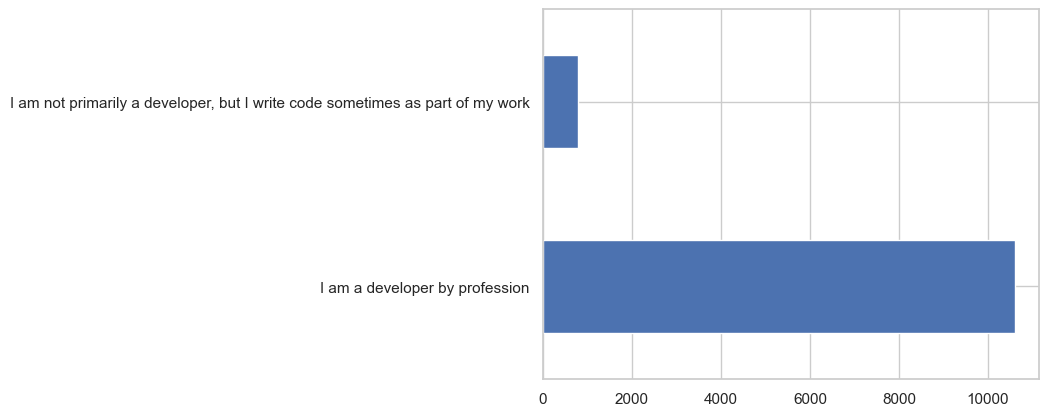

In [ ]:
df['MainBranch'].value_counts().plot(kind='barh')

Close the database connection.


In [ ]:
conn.close()

--2023-05-05 19:14:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.1'

     0K .......... .......... .......... .......... ..........  0%  186K 3m12s
    50K .......... .......... .......... .......... ..........  0%  546K 2m9s
   100K .......... .......... .......... .......... ..........  0%  301K 2m5s
   150K .......... .......... .......... .......... ..........  0%  335K 2m0s
   200K .......... .......... .......... .......... ..........  0%  531K 1m49s
   250

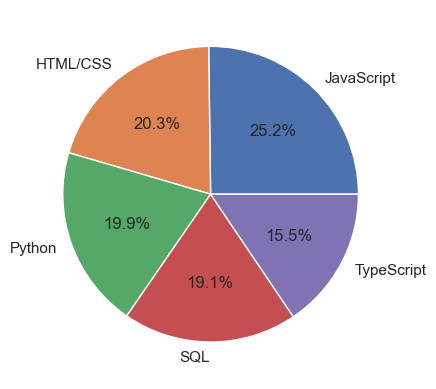

,LanguageDesireNextYear,Respondents
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [175]:
# In the list of most popular languages respondents wish to learn next year, what is the rank of Python?
query = """
SELECT 
LanguageDesireNextYear,
COUNT(DISTINCT Respondent) Respondents

FROM LanguageDesireNextYear
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5
"""
df = pd.read_sql_query(query,conn)
df

In [184]:
# How many respondents indicated that they currently work with 'SQL'? 
query = """
SELECT 
LanguageWorkedWith,
COUNT(DISTINCT Respondent) Respondents

FROM LanguageWorkedWith
GROUP BY 1
ORDER BY 2 DESC
"""
df = pd.read_sql_query(query,conn)
df.head(10)

,LanguageWorkedWith,Respondents
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [195]:
# How many respondents indicated that they work on 'MySQL' only? 
query = """
WITH 
respondent_with_only_one_base AS (
    SELECT 
        Respondent,
        COUNT(DISTINCT DatabaseWorkedWith) AS databases
    FROM DatabaseWorkedWith
    GROUP BY Respondent
    HAVING COUNT(DISTINCT DatabaseWorkedWith)=1
    ORDER BY 2 DESC
)
SELECT 
A.Respondent,
B.DatabaseWorkedWith
FROM respondent_with_only_one_base AS A
LEFT JOIN DatabaseWorkedWith AS B
    ON A.Respondent=B.Respondent
WHERE DatabaseWorkedWith='MySQL'
"""
df = pd.read_sql_query(query,conn)
df.Respondent.nunique()

474

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
